# Lab8-Clustering on July 13th by Keon

## 1st part, Introduction to the concept of Hierarchical Clustering

<br>There are two types of hierarchical clustering: Agglomerative and Divisive. 
<br>In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.
#### Data Mining Summer 2021, UVic
Reference website for Hierarchical Clustering:
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
<br>
Reference paper for Hierarchical Clustering:
https://onlinelibrary.wiley.com/doi/pdf/10.1002/widm.53?casa_token=KGHXXPEHJkMAAAAA%3A-HnQ55xq6m0CdPXTdEC5_vl8tmPc1dpwTxoZXKU3vBePy8ChPcuJ2X36KgSLgEPeeqva7uAG9ivhGrI
<br>
Scipy library website for the clustering example: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [ ]:
# import library 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

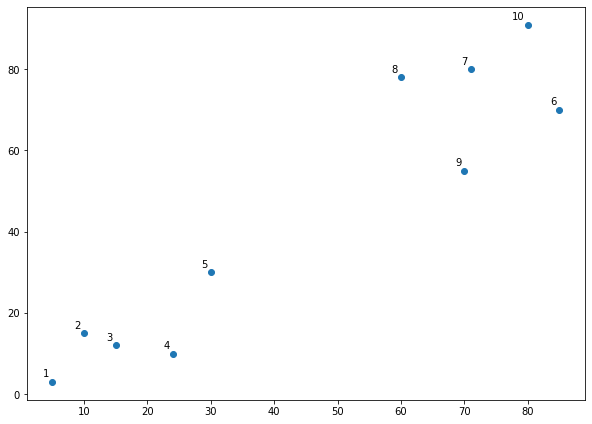

In [ ]:
# Define an array for an example
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

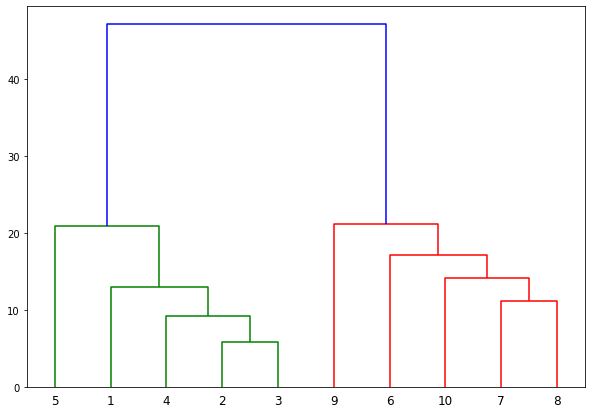

In [ ]:
## scipy library for dendrograms
# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


### - AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally, the linkage parameter is set to "ward", which minimizes the variant between the clusters.

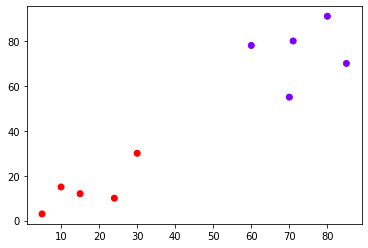

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## 2nd part, Music Data Mining example for Hierarchical Clustering


### sci-kit learn agglomerative clustering link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### Music Genre Dataset (.csv) info: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
# Dataset info : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
genre_data = pd.read_csv('features_30_sec.csv') # 10 genres 
print("Data shape:",genre_data.shape)

Data shape: (1000, 60)


In [ ]:
genre_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
data = genre_data.iloc[:, 2:4].values
data

array([[0.35008812, 0.08875657],
       [0.34091359, 0.09498025],
       [0.36363718, 0.0852752 ],
       ...,
       [0.43214202, 0.0752685 ],
       [0.36248457, 0.09150553],
       [0.35840133, 0.08588409]])

In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler 
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data) 
print(scaled)

[[0.36227871 0.69546819]
 [0.34362165 0.79339231]
 [0.38983171 0.6406919 ]
 ...
 [0.52914126 0.48324551]
 [0.3874878  0.73872059]
 [0.37918422 0.65027238]]


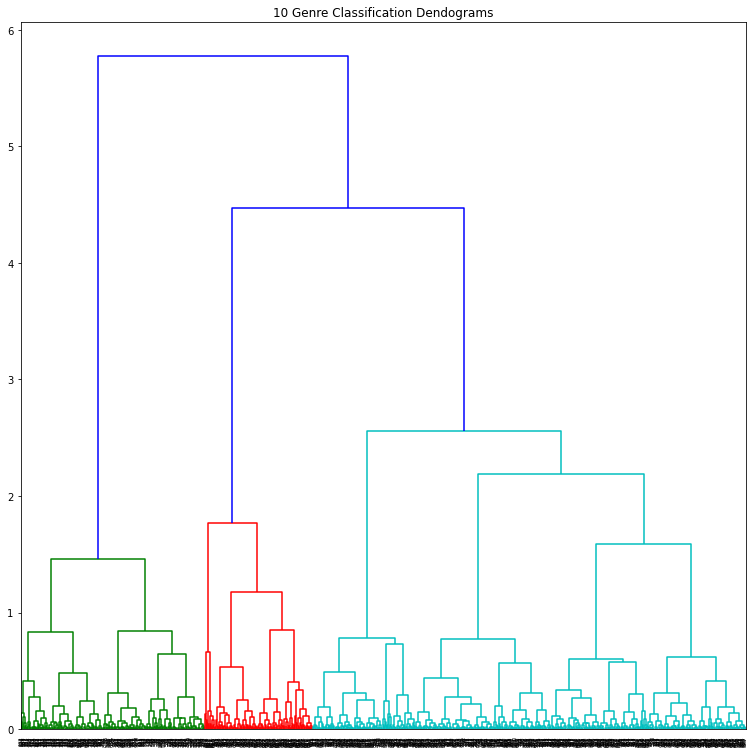

In [ ]:
# scipy library for dendrograms
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13, 13))
plt.title("10 Genre Classification Dendograms")
dend = shc.dendrogram(shc.linkage(scaled, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled)

array([4, 3, 4, 3, 0, 0, 0, 0, 7, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 4, 3, 4,
       4, 6, 3, 4, 4, 0, 6, 4, 3, 7, 7, 6, 6, 7, 4, 7, 7, 9, 0, 0, 4, 1,
       4, 4, 1, 1, 0, 4, 4, 4, 4, 8, 4, 7, 7, 7, 4, 4, 4, 7, 4, 0, 3, 3,
       3, 3, 3, 6, 3, 3, 3, 3, 0, 3, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 4, 4,
       0, 1, 4, 0, 0, 1, 4, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 4, 4, 7, 0, 4, 4, 7, 7, 7, 4, 9, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0,
       4, 0, 0, 0, 0, 4, 4, 7, 0, 0, 1, 4, 0, 0, 3, 4, 4, 4, 4, 9, 4, 7,
       4, 7, 4, 3, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 4, 4, 1, 4, 4, 4, 3,
       0, 0, 4, 0, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 1, 4, 6,

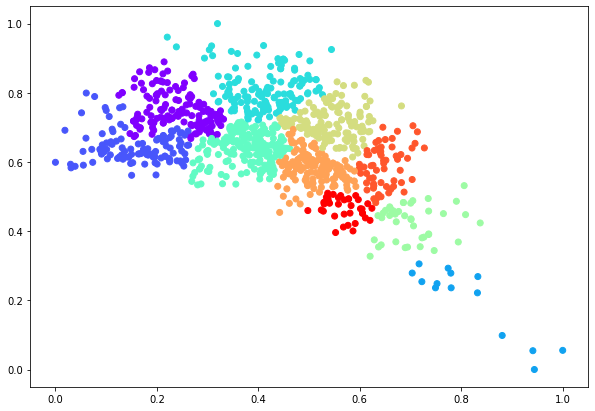

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled[:,0], scaled[:,1], c=cluster.labels_, cmap='rainbow')

## 3rd part, Clustering with K-Means algorithm
### sci-kit learn agglomerative clustering link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br>- The K-Means algorithm is an unsupervised clustering algorithm. It takes a bunch of unlabeled points and tries to group them into “K” number of clusters. 
<br>- K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
<br>- The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.
<br>- In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

### Reference websites K-Means: 
1.https://becominghuman.ai/comprehending-k-means-and-knn-algorithms-c791be90883d#:~:text=The%20'K'%20in%20K%2D,learning%20algorithm%20used%20for%20classification.
<br>2.https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
<br>3.https://geodacenter.github.io/workbook/7b_clusters_2/lab7b.html#single-linkage

In [ ]:
# Create dataset to compare with KMeans
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)
t.shape


(1, 1500)

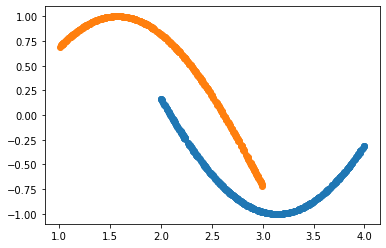

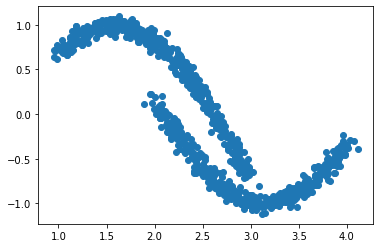

In [ ]:
# Generate sample data
n_samples = 500
np.random.seed(0)
sin_x = np.random.uniform(low=1, high=3, size=(1, n_samples))
cos_x = np.random.uniform(low=2, high=4, size=(1, n_samples))
c = 2 * (np.cos(cos_x) + 0.5)
s = 2 * (np.sin(sin_x) - 0.5)

plt.scatter(cos_x, c)
plt.scatter(sin_x, s)
plt.show()

data1 = np.concatenate((cos_x, c))
data2 = np.concatenate((sin_x, s))
data = np.concatenate((data1, data2), axis=1)
data += .05 * np.random.randn(2, 2 * n_samples)
plt.scatter(data[0, :], data[1, :])
plt.show()
data = data.T


ward linkage


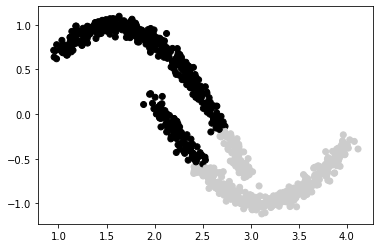

complete linkage


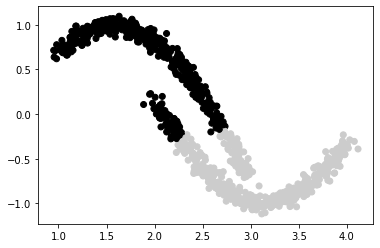

average linkage


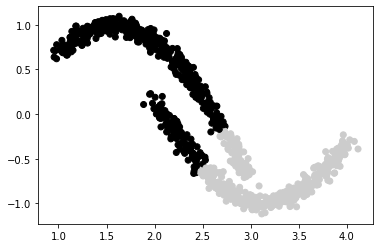

single linkage


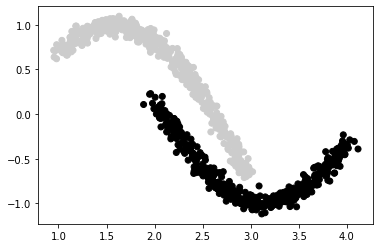

In [ ]:
linkages = ['ward', 'complete', 'average', 'single']
linkages = np.array(linkages)

for i in range(len(linkages)):
    print(linkages[i],"linkage")
    model = AgglomerativeClustering(linkage=linkages[i], n_clusters=2)
    model.fit(data)
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
    plt.show()


K-Means


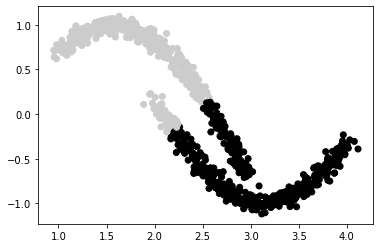

In [ ]:
from sklearn.cluster import KMeans
print("K-Means")
kmeans = KMeans(n_clusters=2, max_iter=1, random_state=0).fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap=plt.cm.nipy_spectral)
plt.show()

In [ ]:
#Importing all the needed libraries
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
# Dataset info : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
genre_data = pd.read_csv('features_30_sec.csv') # 10 genres 
print("Data shape:",genre_data.shape)

Data shape: (1000, 60)


In [ ]:
genre_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
# Extract certain values from the genre data 
data = genre_data.iloc[:, 2:4].values
data

# Normalization
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[0.36227871 0.69546819]
 [0.34362165 0.79339231]
 [0.38983171 0.6406919 ]
 ...
 [0.52914126 0.48324551]
 [0.3874878  0.73872059]
 [0.37918422 0.65027238]]


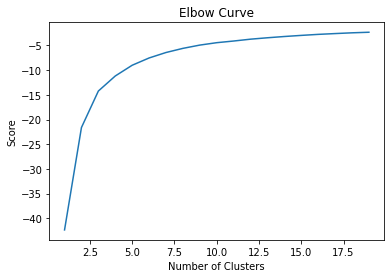

In [ ]:
#Finding the optimum number of clusters for k-means clustering
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(scaled).score(scaled) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
model = KMeans(n_clusters = 10)
model.fit(scaled)

KMeans(n_clusters=10)

In [ ]:
model.labels_

array([0, 6, 2, 6, 0, 0, 3, 3, 2, 3, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 6,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 2, 6, 2,
       2, 4, 6, 0, 2, 3, 4, 2, 6, 2, 9, 4, 2, 2, 2, 2, 9, 9, 3, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 8, 2, 2, 9, 9, 2, 2, 0, 9, 2, 0, 6, 6,
       6, 6, 6, 4, 6, 6, 6, 6, 3, 6, 9, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0,
       5, 0, 3, 0, 5, 0, 0, 3, 5, 5, 5, 5, 5, 5, 2, 5, 0, 0, 0, 2, 2, 0,
       0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 6, 5, 0, 5,
       0, 0, 2, 9, 3, 2, 2, 9, 9, 9, 2, 9, 3, 3, 0, 2, 2, 2, 0, 2, 2, 3,
       2, 3, 0, 3, 3, 0, 0, 2, 0, 0, 5, 0, 0, 0, 6, 2, 0, 2, 2, 9, 2, 2,
       2, 2, 2, 6, 2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 6,
       3, 3, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 6, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 0, 0, 5, 2, 4,

In [ ]:
model.cluster_centers_

array([[0.30463786, 0.66646991],
       [0.66964884, 0.43670634],
       [0.42861936, 0.63542652],
       [0.20797871, 0.78392669],
       [0.54256193, 0.7259431 ],
       [0.14439933, 0.64143874],
       [0.40988595, 0.80560708],
       [0.82241909, 0.19407954],
       [0.63317932, 0.61254788],
       [0.52671282, 0.54757501]])

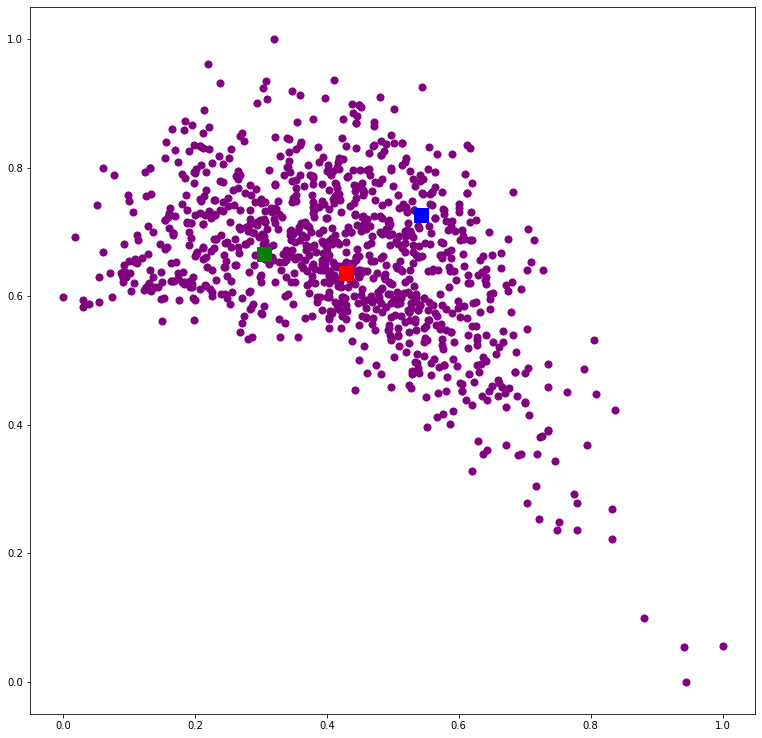

In [ ]:
cluster_loc=model.cluster_centers_
plt.figure(figsize=(13, 13))
plt.scatter(scaled[ : , 0], scaled[ : , 1], s =50, c='purple')
plt.scatter(cluster_loc[0][0], cluster_loc[0][1], s=200, c='green', marker='s')
plt.scatter(cluster_loc[2][0], cluster_loc[2][1], s=200, c='red', marker='s')
plt.scatter(cluster_loc[4][0], cluster_loc[4][1], s=200, c='blue', marker='s')
plt.show()

# Optional Part - Handling imbalanced data


* It happens when the observation of one class is much higher or lower than the other class
    * Anomally Detection, Fraud Detection, etc
    * https://www.kaggle.com/qianchao/smote-with-imbalance-data
* Standard ML techniques have a bias towards the **majority** class, and they tend to ignore the minority class.
* 5 kinds of techniques: https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html



## SMOTE (Synthetic Minority Over-sampling Technique)
* SMOTE first selects a minority class instance 'a' at random and finds its K-Nearest minority class neighbors. The synthetic instance is then created by choosing one of the K-nearest Neighbors 'b' at random and connecting 'a' and 'b' to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances: 'a' and 'b'.
 (Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.)
* The combination of SMOTE and under-sampling performs better than plain under-sampling.
 (SMOTE: Synthetic Minority Over-sampling Technique, 2011.)
### SMOTE paper: https://arxiv.org/pdf/1106.1813.pdf
### Instructions for installing SMOTE imbalanced learning library within sci-kit learn: https://github.com/scikit-learn-contrib/imbalanced-learn

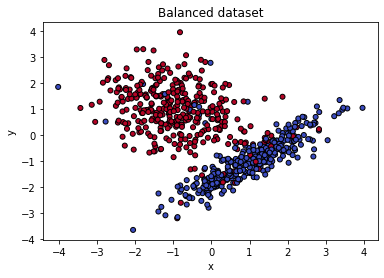

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
seed = 100

# create balanced dataset
X1, Y1 = make_classification(n_samples=700, n_features=2, n_redundant=0,
                            n_informative=2, n_clusters_per_class=1,
                            class_sep=1.0, flip_y=0.06, random_state=seed)

plt.title('Balanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()
# concatenate the features and labels into one dataframe
df = pd.concat([pd.DataFrame(X1), pd.DataFrame(Y1)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
# save the dataset because we'll use it later
df.to_csv('df_base.csv', index=False, encoding='utf-8')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 



def train_SVM(df):
    # select the feature columns
    X = df.loc[:, df.columns != 'label']
    # select the label column
    y = df.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 


    # train an SVM with linear kernel
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    return clf,X_test,y_test


def plot_svm_boundary(clf, df, title):
   fig, ax = plt.subplots()
   X0, X1 = df.iloc[:, 0], df.iloc[:, 1]

   x_min, x_max = X0.min() - 1, X0.max() + 1
   y_min, y_max = X1.min() - 1, X1.max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

   ax.scatter(X0, X1, c=df.label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
   ax.set_ylabel('y')
   ax.set_xlabel('x')
   ax.set_title(title)
   plt.show()


[[97 11]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       108
           1       0.90      0.95      0.92       102

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.93      0.92      0.92       210



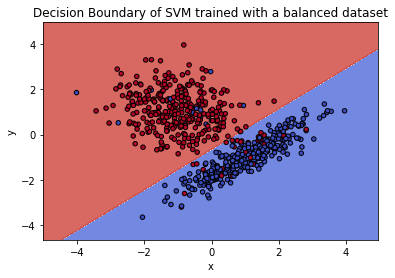

In [ ]:
df = pd.read_csv('df_base.csv', encoding='utf-8', engine='python')
clf,X_test,y_test = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a balanced dataset')

In [ ]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


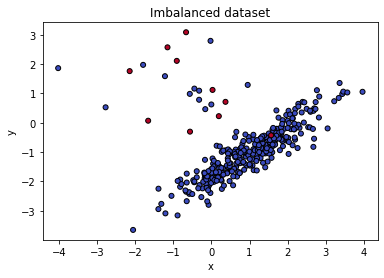

In [ ]:
from imblearn.datasets import make_imbalance
X_res , y_res = make_imbalance(X1, Y1, sampling_strategy={0: 340, 1: 10}, random_state=seed)
plt.title('Imbalanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()


df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_imbalanced.csv', index=False, encoding='utf-8')

[[102   3]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.00      0.00      0.00         0

    accuracy                           0.97       105
   macro avg       0.50      0.49      0.49       105
weighted avg       1.00      0.97      0.99       105



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


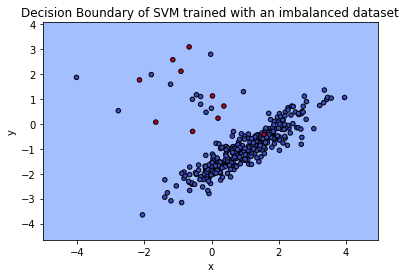

In [ ]:
df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
clf,X_test,y_test = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with an imbalanced dataset')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'tuple'>


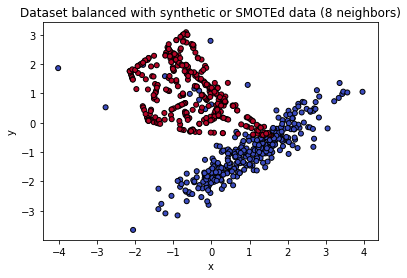

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
X = df.loc[:, df.columns != 'label']
y = df.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
print(type(X_res))
X_res1 = X_res
print(type(X_res1))
y_res1 = np.asarray(y_res)
print(type(y_res.shape))
plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res1.iloc[:, 0], X_res1.iloc[:, 1], marker='o', c=y_res1,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

[[99  0]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.50      0.67         6

    accuracy                           0.97       105
   macro avg       0.99      0.75      0.83       105
weighted avg       0.97      0.97      0.97       105



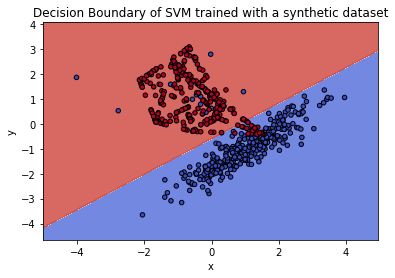

In [ ]:
df = pd.read_csv('df_smoted.csv', encoding='utf-8', engine='python')
clf,X_test_temp,y_test_temp = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a synthetic dataset')

## Under-sampling Technique 
* It removes samples from the majority class which are closer to the minority class samples
* This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper (Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.), it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.
* A general downside of the approach(SMOTE) is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.
* Check for removing the downside of SMOTE. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/